<a href="https://colab.research.google.com/github/neenumohan/helloworld/blob/main/Braille.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import os
from tensorflow import keras
from pathlib import Path
from sklearn.preprocessing import LabelEncoder
import PIL
import cv2
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
tf.__version__

'2.7.0'

In [4]:
img_dir= Path('/content/drive/MyDrive/archive/Braille Dataset/Braille Dataset')
dir_list = list(img_dir.glob('*.jpg'))
image_count = len(dir_list)
name_list = []
for i in dir_list:
    name_list.append(os.path.basename(i)[0])
images = []
for dir in dir_list:
    I = cv2.imread(str(dir))
    images.append(I)

In [5]:
images_list = np.array(images)
name_list = np.array(name_list).T
le = LabelEncoder()
name_list = le.fit_transform(name_list)
images_list = images_list / 255.0

In [6]:
images_list.shape

(1560, 28, 28, 3)

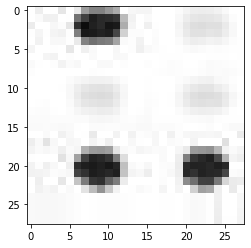

In [7]:
plt.imshow(images_list[0])

In [8]:
images_list.shape
name_list.shape

(1560,)

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(images_list, name_list, test_size=0.2, random_state=42)

In [11]:
model = keras.Sequential([
    keras.layers.Conv2D(filters=64, kernel_size=(5, 5), padding='same', activation='relu'),
    keras.layers.Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Flatten(),
    keras.layers.Dense(units=576, activation="relu"),
    keras.layers.Dense(units=288, activation="relu"),
    keras.layers.Dense(units=26, activation="softmax") #output layer
])


In [12]:
model.compile(optimizer="Adam", loss="SparseCategoricalCrossentropy", metrics=["sparse_categorical_accuracy"])

In [13]:
from keras.callbacks import EarlyStopping
es1 = EarlyStopping(patience=20, monitor="val_acc", mode="auto")
es2 = EarlyStopping(patience=20, monitor="val_loss", mode="auto")

#The neural network will stop fitting if it gets 20 epochs without converge

history = model.fit(x=X_train,
                    y=y_train,
                    epochs=1000,
                    validation_split=0.3,
                    callbacks=[es1, es2])

Epoch 1/1000
28/28 [==============================] - 7s 226ms/step - loss: 3.2643 - sparse_categorical_accuracy: 0.0367 - val_loss: 3.2580 - val_sparse_categorical_accuracy: 0.0347
Epoch 2/1000
28/28 [==============================] - 6s 219ms/step - loss: 2.9615 - sparse_categorical_accuracy: 0.1375 - val_loss: 2.0472 - val_sparse_categorical_accuracy: 0.3813
Epoch 3/1000
28/28 [==============================] - 6s 219ms/step - loss: 1.4871 - sparse_categorical_accuracy: 0.5991 - val_loss: 1.2405 - val_sparse_categorical_accuracy: 0.6480
Epoch 4/1000
28/28 [==============================] - 6s 217ms/step - loss: 0.9619 - sparse_categorical_accuracy: 0.7274 - val_loss: 1.0733 - val_sparse_categorical_accuracy: 0.7147
Epoch 5/1000
28/28 [==============================] - 6s 219ms/step - loss: 0.6526 - sparse_categorical_accuracy: 0.8087 - val_loss: 0.8136 - val_sparse_categorical_accuracy: 0.7973
Epoch 6/1000
28/28 [==============================] - 6s 218ms/step - loss: 0.4164 - spars

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        4864      
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 7, 7, 64)          3

In [15]:
import seaborn as sns

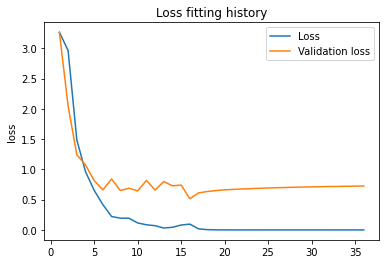

In [16]:
time = np.arange(1, len(history.history['loss'])+1)

sns.lineplot(data=history.history, x=time, y='loss')
sns.lineplot(data=history.history, x=time, y='val_loss')
plt.title('Loss fitting history')
plt.legend(labels=['Loss', 'Validation loss'])

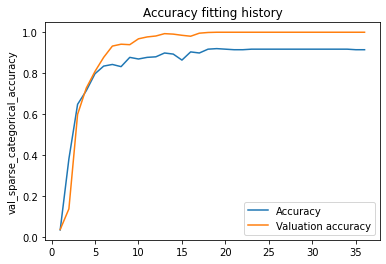

In [17]:
sns.lineplot(data=history.history, x=time, y='val_sparse_categorical_accuracy')
sns.lineplot(data=history.history, x=time, y='sparse_categorical_accuracy')
plt.title('Accuracy fitting history')
plt.legend(labels=['Accuracy', 'Valuation accuracy'])


In [18]:
model.evaluate(X_test, y_test)

10/10 [==============================] - 1s 52ms/step - loss: 0.5892 - sparse_categorical_accuracy: 0.9038


[0.5892030000686646, 0.9038461446762085]

In [19]:
predict_x=model.predict(X_test) 
classes_x=np.argmax(predict_x,axis=1)

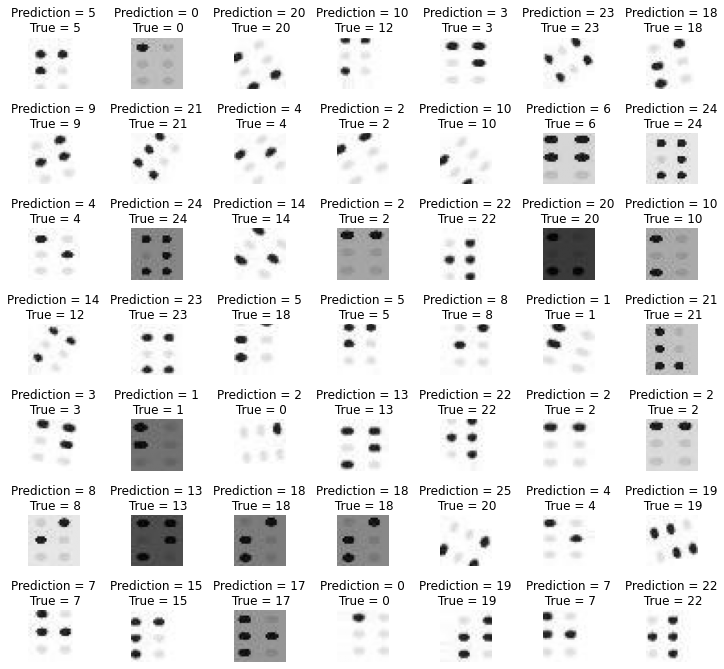

In [20]:
L = 7
W = 7
fig, axes = plt.subplots(L, W, figsize = (12, 12))
axes = axes.ravel()
for i in np.arange(0, L*W):
 axes[i].imshow(X_test[i])
 axes[i].set_title('Prediction = {}\n True = {}'.format(classes_x[i], y_test[i]))
 axes[i].axis('off')
plt.subplots_adjust(wspace = 1)

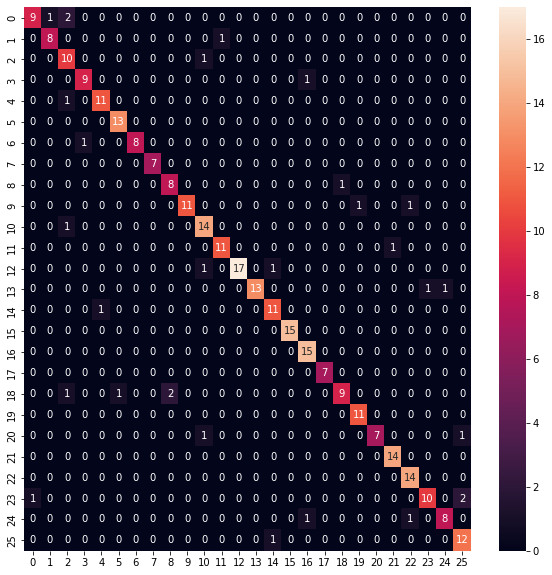

In [21]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test, classes_x)
cm
plt.figure(figsize = (10, 10))
sns.heatmap(cm, annot = True)